In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Data Preprocessing

In [3]:
good_df = pd.read_csv('../../data/raw/good.csv')
high_bad_df = pd.read_csv('../../data/raw/high bad.csv')
low_bad_df = pd.read_csv('../../data/raw/low bad.csv')

In [4]:
print(f"Good DataFrame: {good_df.shape}")
print(f"High Bad DataFrame: {high_bad_df.shape}")
print(f"Low Bad DataFrame: {low_bad_df.shape}")

Good DataFrame: (13302, 33)
High Bad DataFrame: (14495, 33)
Low Bad DataFrame: (2578, 33)


In [5]:
columns_match = set(good_df.columns) == set(high_bad_df.columns) == set(low_bad_df.columns)
print(f"DataFrame with the same column: {columns_match}")

DataFrame with the same column: True


In [6]:
# Add a 'Quality' column to distinguish the data sources
good_df['Quality'] = 'Good'
high_bad_df['Quality'] = 'High_Bad'
low_bad_df['Quality'] = 'Low_Bad'

In [7]:
# Combine into a single DataFrame
df = pd.concat([good_df, high_bad_df, low_bad_df], ignore_index=True)

In [8]:
print(f"Combined DataFrame shape: {df.shape}")
print("Quality Distribution:")
print(df['Quality'].value_counts())

Combined DataFrame shape: (30375, 34)
Quality Distribution:
Quality
High_Bad    14495
Good        13302
Low_Bad      2578
Name: count, dtype: int64


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30375 entries, 0 to 30374
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   VYP batch                      30375 non-null  object 
 1   Part                           30375 non-null  object 
 2   Set Time                       30375 non-null  object 
 3   FFTE Feed solids SP            30375 non-null  float64
 4   FFTE Production solids SP      30375 non-null  float64
 5   FFTE Steam pressure SP         30375 non-null  float64
 6   TFE Out flow SP                30375 non-null  float64
 7   TFE Production solids SP       30375 non-null  float64
 8   TFE Vacuum pressure SP         30375 non-null  float64
 9   TFE Steam pressure SP          30375 non-null  float64
 10  Extract tank Level             30375 non-null  float64
 11  FFTE Discharge density         30375 non-null  float64
 12  FFTE Discharge solids          30375 non-null 

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
FFTE Feed solids SP,30375.0,47.842616,7.001140,25.00,50.000,50.00,50.000,50.00
FFTE Production solids SP,30375.0,41.799225,1.354045,39.00,41.000,42.00,43.000,43.00
FFTE Steam pressure SP,30375.0,114.680402,19.788480,10.00,104.000,117.79,126.000,850.00
TFE Out flow SP,30375.0,2460.843430,386.980982,1240.00,2146.150,2415.38,2846.510,3278.60
TFE Production solids SP,30375.0,64.602949,11.231102,0.00,63.000,66.00,71.000,98.00
TFE Vacuum pressure SP,30375.0,-66.338537,14.526315,-89.00,-79.460,-69.83,-54.600,-35.00
TFE Steam pressure SP,30375.0,118.695536,11.460637,2.00,120.000,120.00,120.000,135.00
Extract tank Level,30375.0,47.915229,17.892706,0.47,38.700,52.32,61.525,75.62
FFTE Discharge density,30375.0,1.233311,0.134591,0.50,1.230,1.27,1.300,1.53
FFTE Discharge solids,30375.0,46.269031,11.815525,-14.07,43.430,47.61,52.620,76.42


In [11]:
df.head(10)

,VYP batch,Part,Set Time,FFTE Feed solids SP,FFTE Production solids SP,FFTE Steam pressure SP,TFE Out flow SP,TFE Production solids SP,TFE Vacuum pressure SP,TFE Steam pressure SP,Extract tank Level,FFTE Discharge density,FFTE Discharge solids,FFTE Feed flow rate PV,FFTE Feed solids PV,FFTE Heat temperature 1,FFTE Heat temperature 2,FFTE Heat temperature 3,FFTE Production solids PV,FFTE Steam pressure PV,TFE Input flow PV,TFE Level,TFE Motor current,TFE Motor speed,TFE Out flow PV,TFE Product out temperature,TFE Production solids PV,TFE Production solids density,TFE Steam pressure PV,TFE Steam temperature,TFE Tank level,TFE Temperature,TFE Vacuum pressure PV,Quality
0,102_2019_07_02,Yeast - BRN,2/07/2019 0:10,50.0,41.09,118.44,2186.05,67.0,-79.82,125.0,46.38,1.27,49.03,9407.91,48.16,59.18,66.49,67.23,49.03,119.64,2096.63,48.45,33.31,80,1942.93,0,64.92,1.13,125.03,64.79,44.61,70,-80.20,Good
1,102_2019_07_02,Yeast - BRN,2/07/2019 0:10,50.0,41.09,118.44,2186.05,67.0,-79.82,125.0,46.38,1.27,49.03,9407.91,48.16,59.18,66.49,67.23,49.03,119.64,2096.63,48.45,33.31,80,1942.93,0,64.92,1.13,125.03,64.79,44.61,70,-80.20,Good
2,102_2019_07_02,Yeast - BRN,2/07/2019 0:10,50.0,41.09,118.44,2186.05,67.0,-79.82,125.0,46.38,1.27,49.03,9407.91,48.16,59.18,66.49,67.23,49.03,119.64,2096.63,48.45,33.31,80,1942.93,0,64.92,1.13,125.03,64.79,44.61,70,-80.20,Good
3,102_2019_07_02,Yeast - BRN,2/07/2019 0:10,50.0,41.09,118.44,2186.05,67.0,-79.82,125.0,46.38,1.27,49.03,9407.91,48.16,59.18,66.49,67.23,49.03,119.64,2096.63,48.45,33.31,80,1942.93,0,64.92,1.13,125.03,64.79,44.61,70,-80.20,Good
4,102_2019_07_02,Yeast - BRN,2/07/2019 0:10,50.0,41.09,118.44,2186.05,67.0,-79.82,125.0,46.38,1.27,49.03,9407.91,48.16,59.18,66.49,67.23,49.03,119.64,2096.63,48.45,33.31,80,1942.93,0,64.92,1.13,125.03,64.79,44.61,70,-80.20,Good
5,102_2019_07_02,Yeast - BRN,2/07/2019 0:10,50.0,41.09,118.44,2186.05,67.0,-79.82,125.0,46.38,1.27,49.03,9407.91,48.16,59.18,66.49,67.23,49.03,119.64,2096.63,48.45,33.31,80,1942.93,0,64.92,1.13,125.03,64.79,44.61,70,-80.20,Good
6,102_2019_07_02,Yeast - BRN,2/07/2019 0:10,50.0,41.09,118.44,2186.05,67.0,-79.82,125.0,46.38,1.27,49.03,9407.91,48.16,59.18,66.49,67.23,49.03,119.64,2096.63,48.45,33.31,80,1942.93,0,64.92,1.13,125.03,64.79,44.61,70,-80.20,Good
7,104_2019_07_02,Yeast - BRN,2/07/2019 1:39,50.0,41.09,118.44,2186.05,67.0,-79.82,125.0,31.73,1.28,48.74,9433.85,47.84,57.74,68.73,66.72,46.34,118.57,2096.63,47.87,31.26,80,1872.24,0,66.80,1.22,124.71,64.79,44.46,69,-80.56,Good
8,104_2019_07_02,Yeast - BRN,2/07/2019 1:39,50.0,41.09,118.44,2186.05,67.0,-79.82,125.0,31.73,1.28,48.74,9433.85,47.84,57.74,68.73,66.72,46.34,118.57,2096.63,47.87,31.26,80,1872.24,0,66.80,1.22,124.71,64.79,44.46,69,-80.56,Good
9,104_2019_07_02,Yeast - BRN,2/07/2019 1:39,50.0,41.09,118.44,2186.05,67.0,-79.82,125.0,31.73,1.28,48.74,9433.85,47.84,57.74,68.73,66.72,46.34,118.57,2096.63,47.87,31.26,80,1872.24,0,66.80,1.22,124.71,64.79,44.46,69,-80.56,Good


# Data Preprocessing

## "Set Time" Analysis

In [12]:
# Convert the 'Set Time' column to datetime format
df['Set Time'] = pd.to_datetime(df['Set Time'], format='%d/%m/%Y %H:%M')

# Extract time components
df['Date'] = df['Set Time'].dt.date
df['Hour'] = df['Set Time'].dt.hour
df['DayOfWeek'] = df['Set Time'].dt.dayofweek
df['Month'] = df['Set Time'].dt.month

# Sort the DataFrame by time
df = df.sort_values(by='Set Time')

<Figure size 1500x500 with 0 Axes>

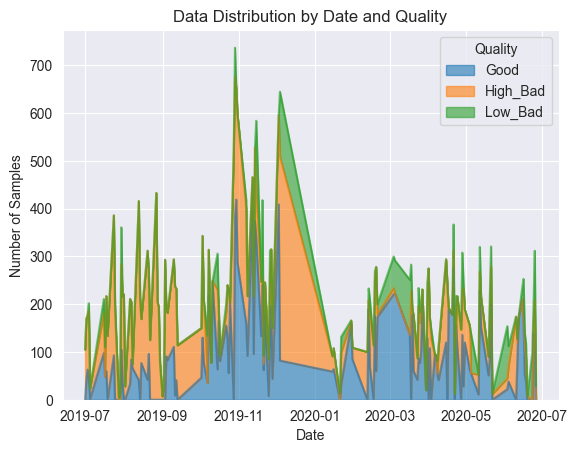

In [13]:
plt.figure(figsize=(15, 5))
df.groupby(['Date', 'Quality']).size().unstack().plot(kind='area', alpha=0.6)
plt.title('Data Distribution by Date and Quality')
plt.ylabel('Number of Samples')
plt.show()

## "Part" Column Analysis 

In [14]:
# Check unique values in the "Part" column
print(df['Part'].unique())

['Yeast - FMX' 'Yeast - BRN' 'Yeast - BRD']


In [15]:
# Count the number of samples for each glaze type
part_counts = df['Part'].value_counts()
print("\nNumber of samples for each glaze type:")
print(part_counts)


Number of samples for each glaze type:
Part
Yeast - BRD    12692
Yeast - FMX    11353
Yeast - BRN     6330
Name: count, dtype: int64


In [16]:
# Distribution of glaze types by quality
part_quality = pd.crosstab(df['Part'], df['Quality'])
print("\nDistribution of glaze types by quality:")
print(part_quality)


Distribution of glaze types by quality:
Quality      Good  High_Bad  Low_Bad
Part                                
Yeast - BRD  6172      5583      937
Yeast - BRN  3130      2307      893
Yeast - FMX  4000      6605      748


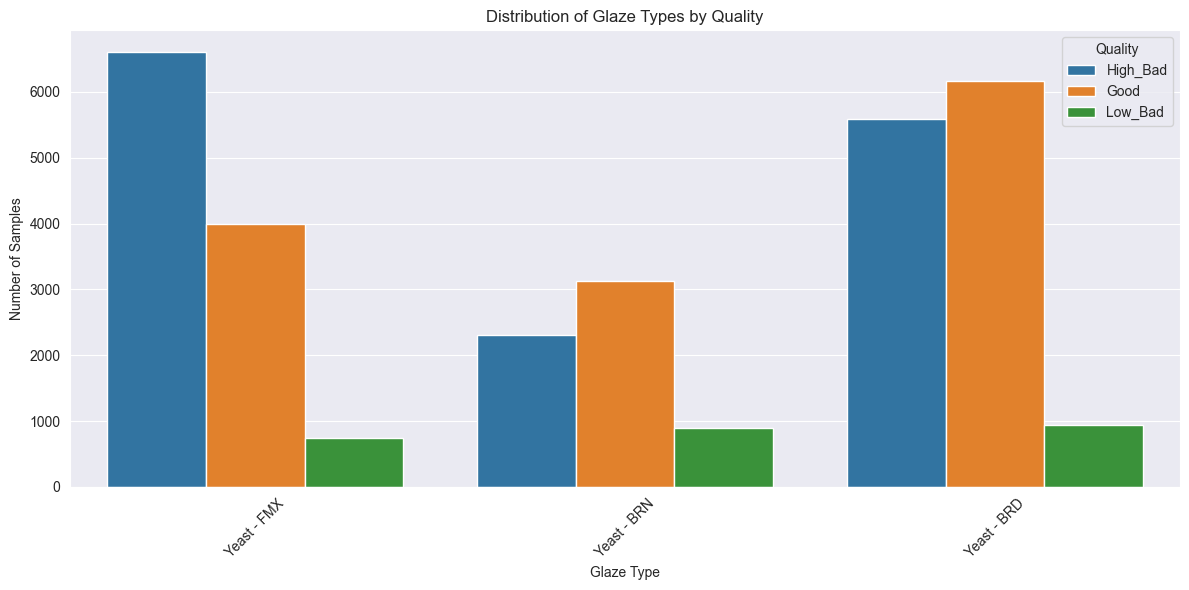

In [17]:
# Plot the distribution of glaze types
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Part', hue='Quality')
plt.title('Distribution of Glaze Types by Quality')
plt.xlabel('Glaze Type')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.legend(title='Quality')
plt.tight_layout()
plt.show()

In [18]:
# Calculate the percentage of each quality type for every glaze type
part_quality_pct = part_quality.div(part_quality.sum(axis=1), axis=0) * 100
print("\nPercentage of each quality type for every glaze type:")
print(part_quality_pct.round(2))


Percentage of each quality type for every glaze type:
Quality       Good  High_Bad  Low_Bad
Part                                 
Yeast - BRD  48.63     43.99     7.38
Yeast - BRN  49.45     36.45    14.11
Yeast - FMX  35.23     58.18     6.59


<Figure size 1200x600 with 0 Axes>

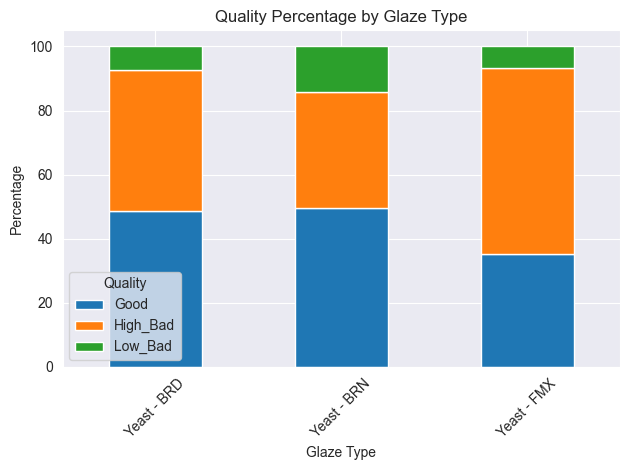

In [19]:
# Plot the quality percentage for each glaze type
plt.figure(figsize=(12, 6))
part_quality_pct.plot(kind='bar', stacked=True)
plt.title('Quality Percentage by Glaze Type')
plt.xlabel('Glaze Type')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Quality')
plt.tight_layout()
plt.show()

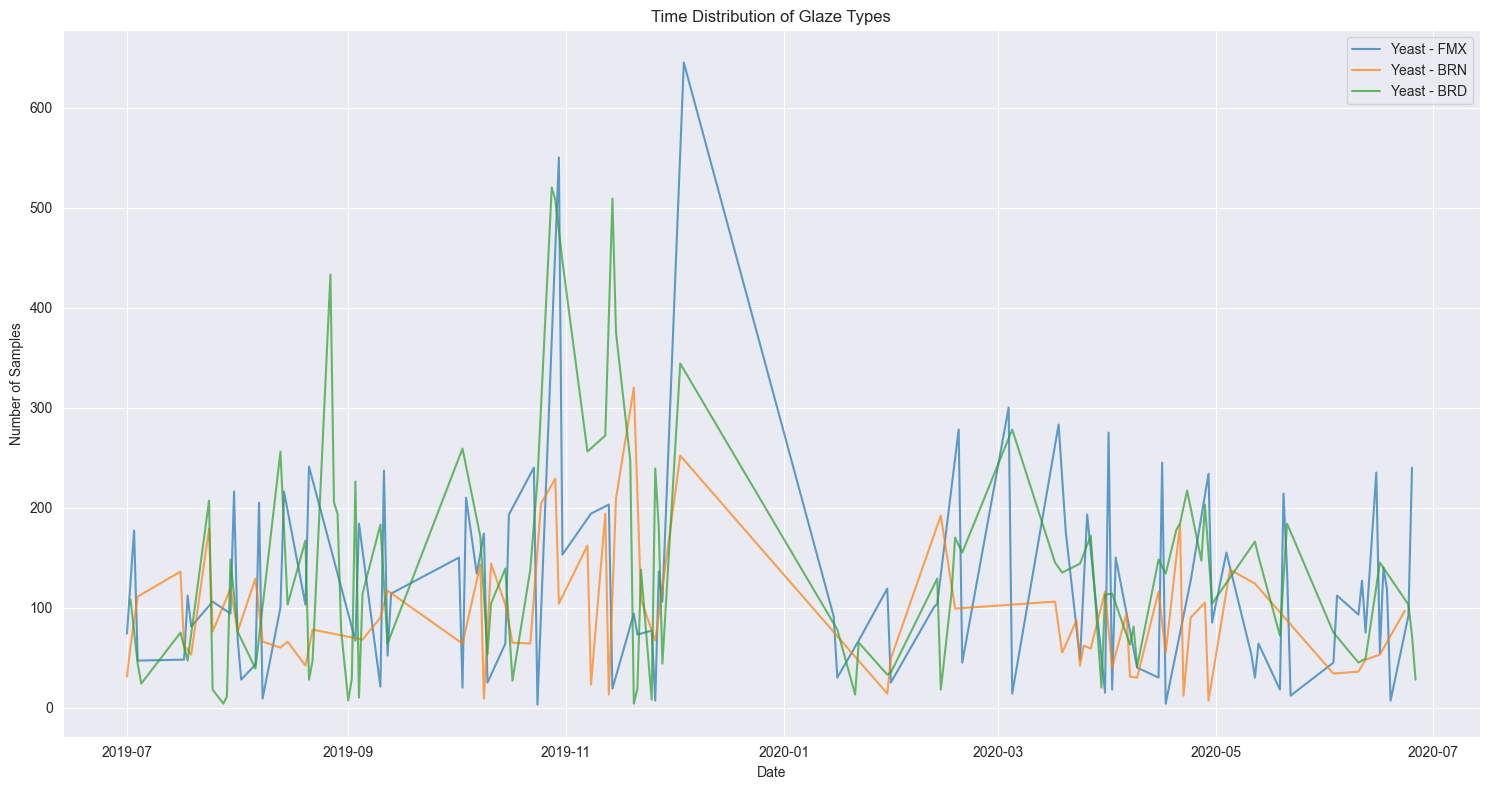

In [20]:
# Check the time distribution of each glaze type
plt.figure(figsize=(15, 8))
for part in df['Part'].unique():
    subset = df[df['Part'] == part]
    plt.plot(subset.groupby('Date').size().index, 
             subset.groupby('Date').size().values,
             label=part, alpha=0.7)
plt.title('Time Distribution of Glaze Types')
plt.xlabel('Date')
plt.ylabel('Number of Samples')
plt.legend()
plt.tight_layout()
plt.show()

## Analyze the relationship between setpoints (SP) and actual values (PV)

In [21]:
# Identify SP and PV columns
sp_columns = [col for col in df.columns if 'SP' in col]
pv_columns = [col for col in df.columns if 'PV' in col]

print(f"Number of SP columns: {len(sp_columns)}")
print(f"Number of PV columns: {len(pv_columns)}")
print("\nSP Columns:")
print(sp_columns)
print("\nPV Columns:")
print(pv_columns)

Number of SP columns: 7
Number of PV columns: 9

SP Columns:
['FFTE Feed solids SP', 'FFTE Production solids SP', 'FFTE Steam pressure SP', 'TFE Out flow SP', 'TFE Production solids SP', 'TFE Vacuum pressure SP', 'TFE Steam pressure SP']

PV Columns:
['FFTE Feed flow rate PV', 'FFTE Feed solids PV', 'FFTE Production solids PV', 'FFTE Steam pressure PV', 'TFE Input flow PV', 'TFE Out flow PV', 'TFE Production solids PV', 'TFE Steam pressure PV', 'TFE Vacuum pressure PV']


In [22]:
# Create corresponding SP-PV pairs
sp_pv_pairs = []
for sp_col in sp_columns:
    feature_name = sp_col.replace(' SP', '')
    pv_col = feature_name + ' PV'
    if pv_col in df.columns:
        sp_pv_pairs.append((sp_col, pv_col))

print(f"\nNumber of SP-PV pairs: {len(sp_pv_pairs)}")
print("SP-PV Pairs:")
for sp, pv in sp_pv_pairs:
    print(f"{sp} - {pv}")


Number of SP-PV pairs: 7
SP-PV Pairs:
FFTE Feed solids SP - FFTE Feed solids PV
FFTE Production solids SP - FFTE Production solids PV
FFTE Steam pressure SP - FFTE Steam pressure PV
TFE Out flow SP - TFE Out flow PV
TFE Production solids SP - TFE Production solids PV
TFE Vacuum pressure SP - TFE Vacuum pressure PV
TFE Steam pressure SP - TFE Steam pressure PV


In [23]:
# Calculate basic deviation
print("\nCalculating deviation between setpoint and actual value...")
for sp_col, pv_col in sp_pv_pairs:
    feature_name = sp_col.replace(' SP', '')
    
    # Absolute deviation
    df[f"{feature_name}_deviation"] = df[sp_col] - df[pv_col]

# Analyze average deviation by glaze type and quality
print("\nAverage deviation by glaze type and quality:")
for part in df['Part'].unique():
    print(f"\nGlaze type: {part}")
    
    # Temporary DataFrame for neat output
    deviation_cols = [col for col in df.columns if 'deviation' in col]
    summary_df = pd.DataFrame()
    
    for quality in df['Quality'].unique():
        subset = df[(df['Part'] == part) & (df['Quality'] == quality)]
        if len(subset) > 0:
            summary_df[quality] = subset[deviation_cols].mean()
    
    # Display the summary table
    print(summary_df.round(3))


Calculating deviation between setpoint and actual value...

Average deviation by glaze type and quality:

Glaze type: Yeast - FMX
                                  High_Bad     Good  Low_Bad
FFTE Feed solids_deviation          -1.819   -0.807   -0.235
FFTE Production solids_deviation    -7.707   -6.661   -8.103
FFTE Steam pressure_deviation        1.695    0.723    1.494
TFE Out flow_deviation             332.393  246.716  194.887
TFE Production solids_deviation      5.568    3.583   -1.165
TFE Vacuum pressure_deviation       -0.249   -0.142    3.140
TFE Steam pressure_deviation         1.978    1.521    4.445

Glaze type: Yeast - BRN
                                  High_Bad     Good  Low_Bad
FFTE Feed solids_deviation          -2.546   -1.416   -0.222
FFTE Production solids_deviation    -2.419   -1.976   -2.165
FFTE Steam pressure_deviation       -0.259    0.116   -0.203
TFE Out flow_deviation              24.803  123.486  177.371
TFE Production solids_deviation      4.791    5.891

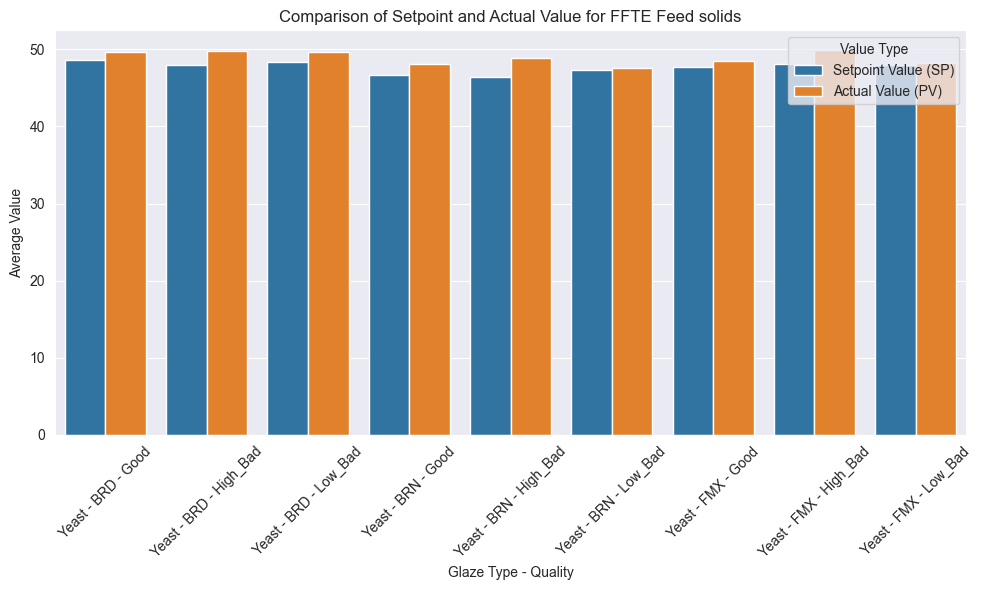

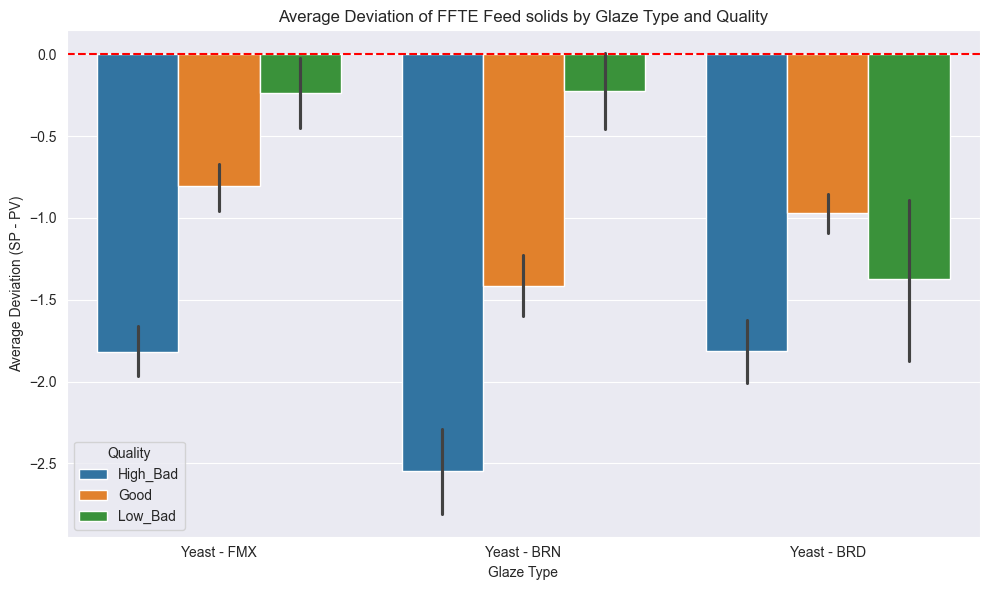

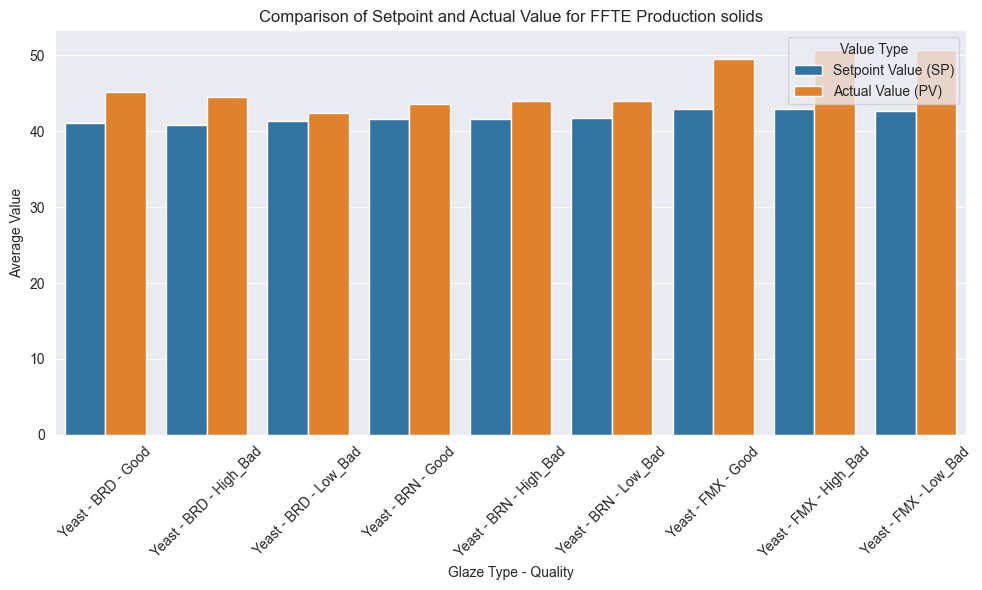

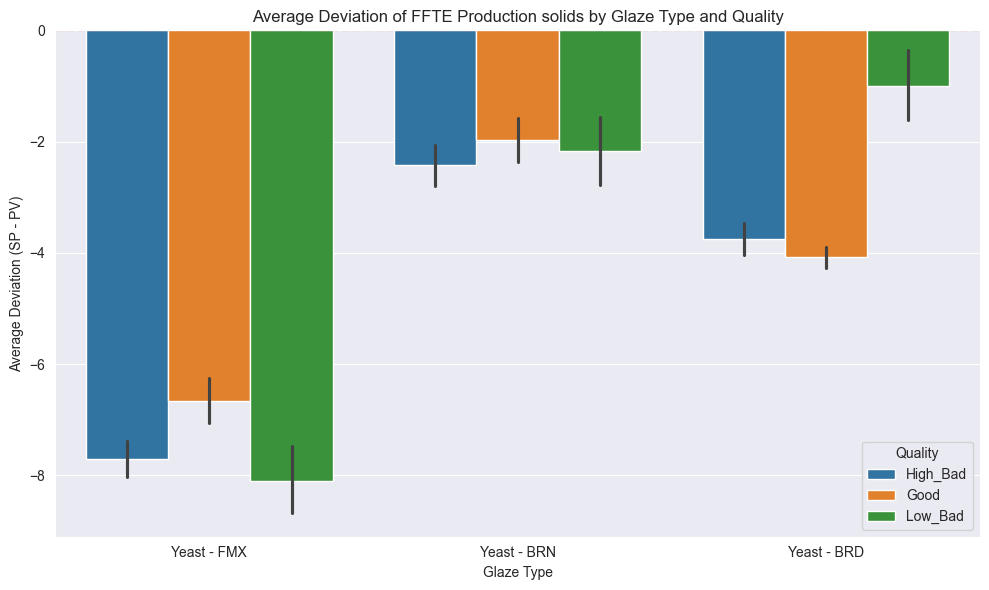

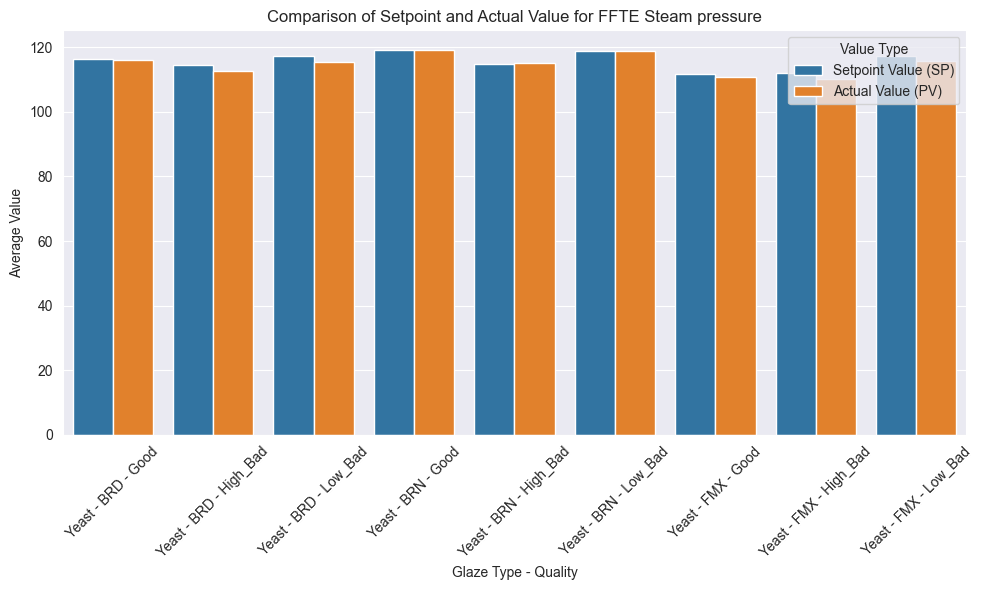

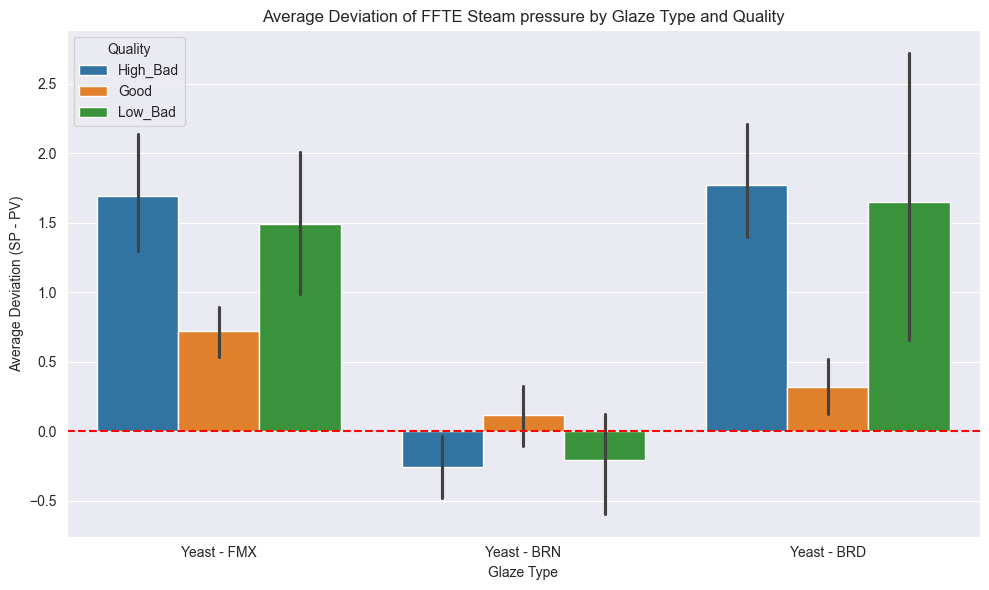

In [24]:
# Select top 3 most important pairs for visualization
important_pairs = sp_pv_pairs[:3]   

for sp_col, pv_col in important_pairs:
    feature_name = sp_col.replace(' SP', '')
    
    deviation_col = f"{feature_name}_deviation"
    
    # Chart 1: Compare average values of SP and PV
    plt.figure(figsize=(10, 6))
    
    # Compute average values by Part and Quality
    avg_values = df.groupby(['Part', 'Quality']).agg({
        sp_col: 'mean',
        pv_col: 'mean'
    }).reset_index()
    
    # Create a DataFrame for grouped bar chart
    chart_data = pd.DataFrame({
        'Part_Quality': avg_values['Part'] + ' - ' + avg_values['Quality'],
        'Setpoint Value (SP)': avg_values[sp_col],
        'Actual Value (PV)': avg_values[pv_col]
    })
    
    # Melt the DataFrame for plotting
    chart_data_melted = pd.melt(chart_data, 
                                id_vars=['Part_Quality'],
                                value_vars=['Setpoint Value (SP)', 'Actual Value (PV)'],
                                var_name='Value Type', 
                                value_name='Value')
    
    sns.barplot(x='Part_Quality', y='Value', hue='Value Type', data=chart_data_melted)
    plt.title(f'Comparison of Setpoint and Actual Value for {feature_name}')
    plt.xlabel('Glaze Type - Quality')
    plt.ylabel('Average Value')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Chart 2: Average deviation by glaze type and quality
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Part', y=deviation_col, hue='Quality', data=df)
    plt.title(f'Average Deviation of {feature_name} by Glaze Type and Quality')
    plt.xlabel('Glaze Type')
    plt.ylabel('Average Deviation (SP - PV)')
    plt.axhline(y=0, color='r', linestyle='--')  
    plt.tight_layout()
    plt.show()

## Outliers Detection

Column FFTE Feed solids SP: 2665 outliers (8.77%)
  - Lower bound: 50.00
  - Upper bound: 50.00

Column FFTE Production solids SP: 0 outliers (0.00%)
  - Lower bound: 38.00
  - Upper bound: 46.00

Column FFTE Steam pressure SP: 1197 outliers (3.94%)
  - Lower bound: 71.00
  - Upper bound: 159.00

Column TFE Out flow SP: 0 outliers (0.00%)
  - Lower bound: 1095.61
  - Upper bound: 3897.05

Column TFE Production solids SP: 3660 outliers (12.05%)
  - Lower bound: 51.00
  - Upper bound: 83.00

Column TFE Vacuum pressure SP: 0 outliers (0.00%)
  - Lower bound: -116.75
  - Upper bound: -17.31

Column TFE Steam pressure SP: 6730 outliers (22.16%)
  - Lower bound: 120.00
  - Upper bound: 120.00


Top columns with highest outlier percentages:
                      Column  Outlier_Count  Outlier_Percentage
0      TFE Steam pressure SP           6730           22.156379
1   TFE Production solids SP           3660           12.049383
2        FFTE Feed solids SP           2665            8.773663


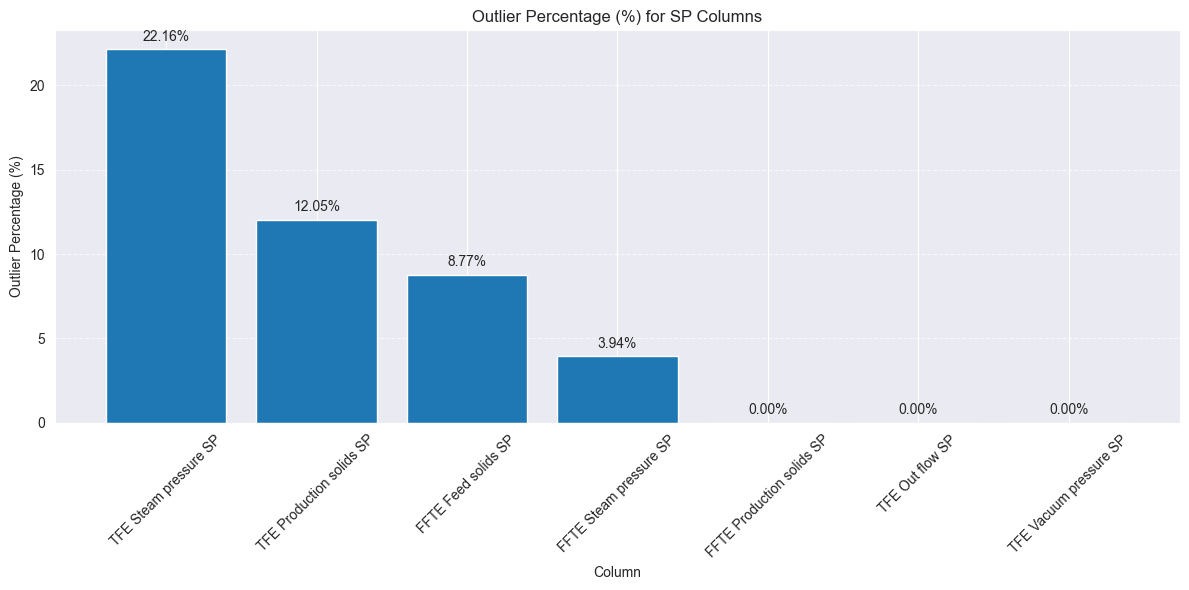


Suggested top 3 columns for outlier handling:
1. TFE Steam pressure SP: 22.16% outliers
2. TFE Production solids SP: 12.05% outliers
3. FFTE Feed solids SP: 8.77% outliers


In [25]:
# Create a DataFrame to store results
outlier_stats = pd.DataFrame(columns=['Column', 'Outlier_Count', 'Outlier_Percentage', 'Lower_Bound', 'Upper_Bound'])

# Only consider SP columns
sp_columns = [col for col in df.columns if 'SP' in col and 'is_outlier' not in col and 'capped' not in col]

# Analyze each column
for i, column in enumerate(sp_columns):
    # Calculate IQR thresholds
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = (df[column] < lower_bound) | (df[column] > upper_bound)
    outlier_count = outliers.sum()
    outlier_percentage = 100 * outlier_count / len(df)

    # Save results
    outlier_stats.loc[i] = [column, outlier_count, outlier_percentage, lower_bound, upper_bound]

    # Print result
    print(f"Column {column}: {outlier_count} outliers ({outlier_percentage:.2f}%)")
    print(f"  - Lower bound: {lower_bound:.2f}")
    print(f"  - Upper bound: {upper_bound:.2f}")
    print()

# Sort results by outlier percentage in descending order
outlier_stats = outlier_stats.sort_values(by='Outlier_Percentage', ascending=False)
print("\nTop columns with highest outlier percentages:")
print(outlier_stats[['Column', 'Outlier_Count', 'Outlier_Percentage']].reset_index(drop=True))

# Visualize the results
plt.figure(figsize=(12, 6))
plt.bar(outlier_stats['Column'], outlier_stats['Outlier_Percentage'])
plt.title('Outlier Percentage (%) for SP Columns')
plt.xticks(rotation=45)
plt.xlabel('Column')
plt.ylabel('Outlier Percentage (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add percentage labels above bars
for i, v in enumerate(outlier_stats['Outlier_Percentage']):
    plt.text(i, v + 0.5, f"{v:.2f}%", ha='center')

plt.tight_layout()
plt.show()

# Suggest top 3 columns for outlier handling
top3_columns = outlier_stats.head(3)['Column'].tolist()
print("\nSuggested top 3 columns for outlier handling:")
for i, col in enumerate(top3_columns):
    pct = outlier_stats.iloc[i]['Outlier_Percentage']
    print(f"{i+1}. {col}: {pct:.2f}% outliers")

Handling outliers for the top 3 most important columns:

Statistics for TFE Steam pressure SP:
  Before capping: mean = 118.70, std = 11.46
  After capping:  mean = 120.00, std = 0.00


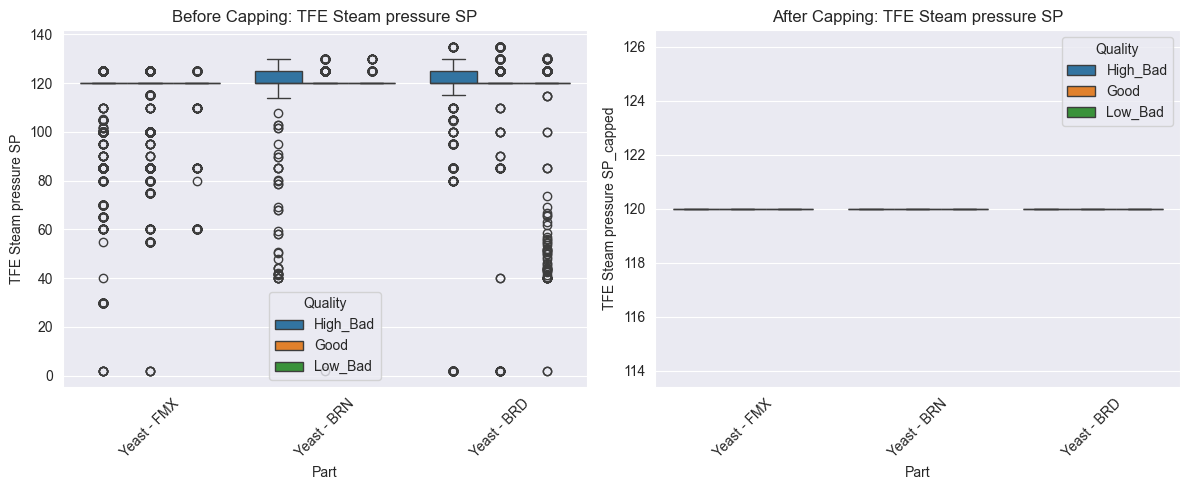


Statistics for TFE Production solids SP:
  Before capping: mean = 64.60, std = 11.23
  After capping:  mean = 65.92, std = 7.42


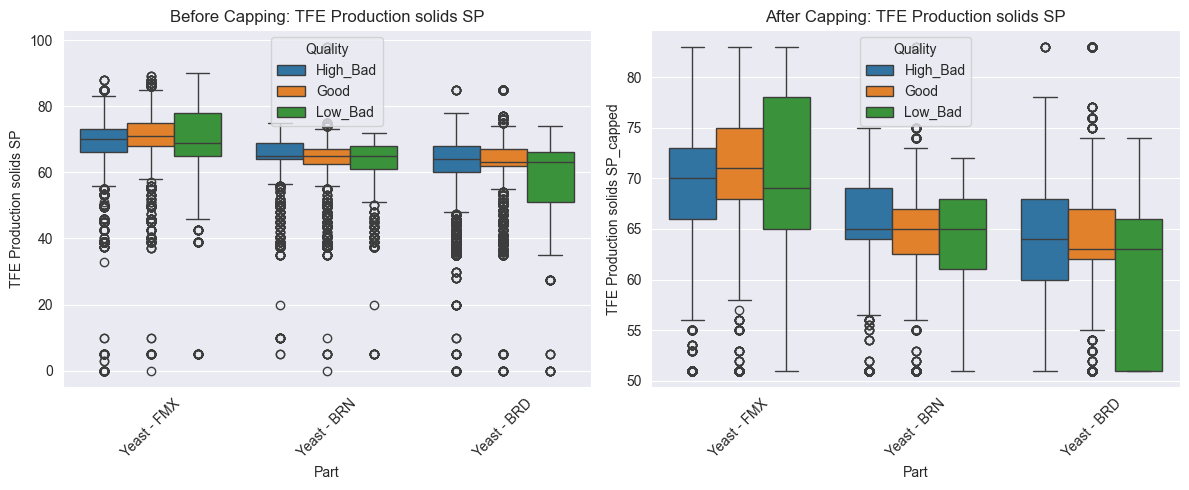


Statistics for FFTE Feed solids SP:
  Before capping: mean = 47.84, std = 7.00
  After capping:  mean = 50.00, std = 0.00


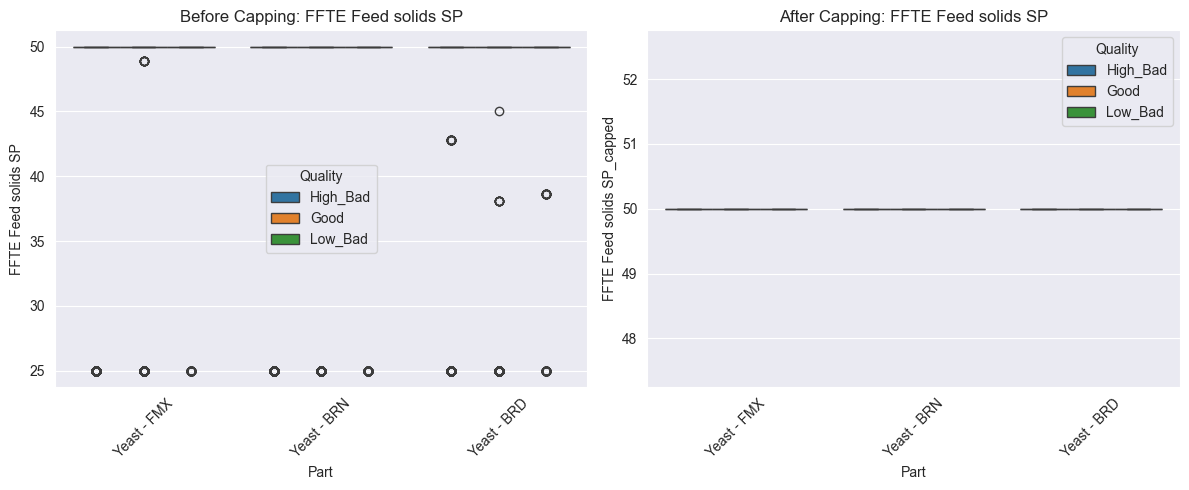

In [26]:
# Outlier Handling - Focus Only on the Top 3 Important Columns
top_outlier_columns = [
    'TFE Steam pressure SP',  # 22.16% outliers
    'TFE Production solids SP',  # 12.05% outliers
    'FFTE Feed solids SP'  # 8.77% outliers
]

print("Handling outliers for the top 3 most important columns:")
for column in top_outlier_columns:
    # Determine outlier thresholds using IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Create a new column with outliers capped
    df[f"{column}_capped"] = df[column].clip(lower=lower_bound, upper=upper_bound)

    # Compare statistics before and after handling
    print(f"\nStatistics for {column}:")
    print(f"  Before capping: mean = {df[column].mean():.2f}, std = {df[column].std():.2f}")
    print(f"  After capping:  mean = {df[f'{column}_capped'].mean():.2f}, std = {df[f'{column}_capped'].std():.2f}")

    # Plot comparison boxplots
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    sns.boxplot(x='Part', y=column, hue='Quality', data=df)
    plt.title(f'Before Capping: {column}')
    plt.xticks(rotation=45)

    plt.subplot(1, 2, 2)
    sns.boxplot(x='Part', y=f"{column}_capped", hue='Quality', data=df)
    plt.title(f'After Capping: {column}')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()


# Save SP & PV recommender data

In [27]:
# Identify SP targets and columns to remove
sp_cols = [c for c in df.columns if c.endswith('SP')]
drop_cols = sp_cols + ['Part', 'VYP batch', 'Set Time', 'Quality', 'quality']
# remove additional intermediate columns if present
drop_cols += [c for c in df.columns if '_capped' in c or '_is_outlier' in c]
# Separate X_num (numeric PV) and X_time (from datetime)
# – Numeric
numerical_cols = [c for c in df.columns if c not in drop_cols and 
                  np.issubdtype(df[c].dtype, np.number)]
X_num = df[numerical_cols].copy()
# – Datetime → derive
X_time = pd.DataFrame(index=df.index)
if 'Set Time' in df.columns or 'SetTime' in df.columns:
    dt_col = 'Set Time' if 'Set Time' in df.columns else 'SetTime'
    df[dt_col] = pd.to_datetime(df[dt_col])
    for attr in ['year','month','day','dayofweek','quarter']:
        X_time[f"{dt_col}_{attr}"] = getattr(df[dt_col].dt, attr)
# Combine X and y
X = pd.concat([X_num, X_time], axis=1)
y = df[sp_cols]
print(f"→ Final X shape: {X.shape}")
print(f"→ Final y shape: {y.shape}")
# Export to CSV for training
out_dir = Path('../../data/processed')
out_dir.mkdir(parents=True, exist_ok=True)
features_path = out_dir / 'recommender_features.csv'
pd.concat([X, y], axis=1).to_csv(features_path, index=False)
print(f"Saved feature-engineered data to {features_path}")

→ Final X shape: (30375, 38)
→ Final y shape: (30375, 7)
Saved feature-engineered data to ../../data/processed/recommender_features.csv
